#Import Libraries

In [5]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=6cd0bc58e1c3e03a5311c3e4c31f94ab94173c14fccc2d79cefbbd7e1bbdc1f5
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [4]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from bs4 import BeautifulSoup
import requests, openpyxl

#Mount Google Drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Scraping data

In [42]:
excel = openpyxl.Workbook()
sheet = excel.active
sheet.title = 'Top rated movies'
sheet.append(['Rank', 'Title', 'Year of Release', 'IMDb Rating'])

try:
    source = requests.get('https://www.imdb.com/chart/top/')
    source.raise_for_status()

    soup = BeautifulSoup(source.text, 'html.parser')

    movies = soup.find('tbody', class_='lister-list').find_all('tr')

    for movie in movies:
        name = movie.find('td', class_='titleColumn').a.text
        rank = movie.find('td', class_='titleColumn').get_text(strip=True).split('.')[0]
        year = movie.find('td', class_='titleColumn').span.text.strip('()')
        rating = movie.find('td', class_='ratingColumn imdbRating').strong.text

        print(rank, name, year, rating)
        sheet.append([rank, name, year, rating])

#Saving to drive
    excel.save('/content/drive/MyDrive/Projects/Scraping IMDb website/IMDb_Movie_Rating.xlsx')
    print("Data saved successfully!")

except Exception as e:
    print("An error occurred:", e)

1 The Shawshank Redemption 1994 9.2
2 The Godfather 1972 9.2
3 The Dark Knight 2008 9.0
4 The Godfather Part II 1974 9.0
5 12 Angry Men 1957 9.0
6 Schindler's List 1993 8.9
7 The Lord of the Rings: The Return of the King 2003 8.9
8 Pulp Fiction 1994 8.8
9 The Lord of the Rings: The Fellowship of the Ring 2001 8.8
10 The Good, the Bad and the Ugly 1966 8.8
11 Spider-Man: Across the Spider-Verse 2023 8.8
12 Forrest Gump 1994 8.8
13 Fight Club 1999 8.7
14 The Lord of the Rings: The Two Towers 2002 8.7
15 Inception 2010 8.7
16 Star Wars: Episode V - The Empire Strikes Back 1980 8.7
17 The Matrix 1999 8.7
18 Goodfellas 1990 8.7
19 One Flew Over the Cuckoo's Nest 1975 8.6
20 Se7en 1995 8.6
21 It's a Wonderful Life 1946 8.6
22 Seven Samurai 1954 8.6
23 The Silence of the Lambs 1991 8.6
24 Saving Private Ryan 1998 8.6
25 City of God 2002 8.6
26 Interstellar 2014 8.6
27 Life Is Beautiful 1997 8.6
28 The Green Mile 1999 8.6
29 Star Wars: Episode IV - A New Hope 1977 8.5
30 Terminator 2: Judgment

#Data Visualization

In [44]:
import pandas as pd

path = "/content/drive/MyDrive/Projects/Scraping IMDb website/IMDb_Movie_Rating.xlsx"
df = pd.read_excel(path)
df.head()
import pandas as pd
#Dataset is now stored in a Pandas Dataframe

,Rank,Title,Year of Release,IMDb Rating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.0
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,9.0


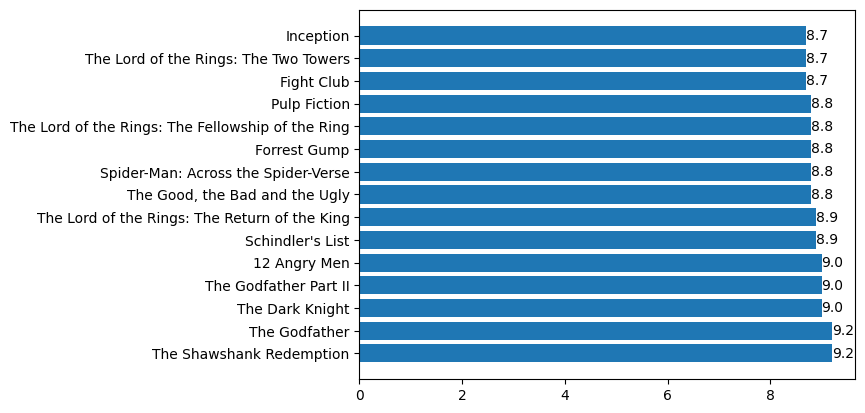

In [53]:
import matplotlib.pyplot as plt

# Sort the DataFrame by rating in descending order
df_sorted = df.sort_values(by='IMDb Rating', ascending=False)

# Bar plot for the top 15 movies
top_movies = df_sorted.head(15)
bars = plt.barh(top_movies['Title'], top_movies['IMDb Rating'])

# Add rating labels on hover
plt.bar_label(bars, labels=top_movies['IMDb Rating'].round(1), label_type='edge')

# Show the plot
plt.show()

In [54]:
import plotly.express as px

# Sort the DataFrame by rating in descending order
df_sorted = df.sort_values(by='IMDb Rating', ascending=False)

# Select the top 15 movies
top_movies = df_sorted.head(15)

# Create a bar plot with hover tooltips
fig = px.bar(top_movies, x='IMDb Rating', y='Title', orientation='h',
             labels={'IMDb Rating': 'Rating', 'Title': 'Movie'},
             hover_data={'IMDb Rating': ':.1f'})

# Customize the hover tooltip format
fig.update_traces(hovertemplate='%{y} <br> Rating: %{x}')

# Show the plot
fig.show()

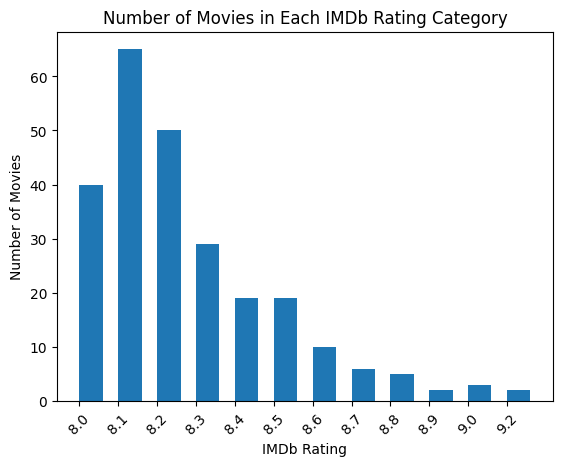

In [62]:
import matplotlib.pyplot as plt

# Count the number of titles in each IMDb rating category
rating_counts = df['IMDb Rating'].value_counts().sort_index()

# Define the positions of the bars
positions = range(len(rating_counts))

# Create the bar graph with separate bars
plt.bar(positions, rating_counts.values, width=0.6, align='edge')  # Adjust the width as per your preference
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each IMDb Rating Category')
plt.xticks(positions, rating_counts.index, rotation=45)
plt.show()
